In [2]:
import re
import argparse
import pandas as pd
from collections import defaultdict
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import stdev

In [11]:
CTG_NAM = 0
CTG_LEN = 1
CTG_STR = 2
CTG_END = 3
CTG_DIR = 4
CHR_NAM = 5
CHR_LEN = 6
CHR_STR = 7
CHR_END = 8
CTG_TYP = 9
CTG_STRND = 10
CTG_ENDND = 11
CTG_TELCHR = 12
CTG_TELDIR = 13
DIR_FOR = 1
DIR_BAK = 0
INF = 1000000000
BUFFER = 10000000
CHROMOSOME_COUNT = 23
K = 1000

def import_data(file_path : str) -> dict :
    graph_file = open(file_path, "r")
    graph_adjacency = {}
    cnt = 0
    for curr_edge in graph_file:
        l, r = curr_edge.split(":")
        r.lstrip()
        r.rstrip(',')
        r = ast.literal_eval('['+r+']')
        if cnt==0:
            cnt+=1
        l = ast.literal_eval(l)
        graph_adjacency[l] = r

    return graph_adjacency

def import_data2(file_path : str) -> list :
    paf_file = open(file_path, "r")
    contig_data = []
    for curr_contig in paf_file:
        temp_list = curr_contig.split("\t")
        int_induce_idx = [1, 2, 3, 6, 7, 8, 9, 10, 11]
        for i in int_induce_idx:
            temp_list[i] = int(temp_list[i])
        contig_data.append(tuple(temp_list))
    return contig_data


CHROMOSOME_COUNT = 23
PREPROCESSED_PAF_FILE_PATH = '20_acc_pipe/HCC1954.p/HCC1954.p.aln.paf.ppc.paf'
contig_data = import_data2(PREPROCESSED_PAF_FILE_PATH)
contig_data_size = len(contig_data)
chr_corr = {}
chr_rev_corr = {}
total_contig_count = len(contig_data)
for i in range(1, CHROMOSOME_COUNT):
    chr_corr['chr'+str(i)+'f'] = total_contig_count + i - 1
    chr_rev_corr[total_contig_count + i - 1] = 'chr'+str(i)+'f'
chr_corr['chrXf'] = total_contig_count + CHROMOSOME_COUNT - 1
chr_corr['chrYf'] = total_contig_count + CHROMOSOME_COUNT - 1
chr_rev_corr[total_contig_count + CHROMOSOME_COUNT - 1] = 'chrXf'
for i in range(1, CHROMOSOME_COUNT):
    chr_corr['chr'+str(i)+'b'] = total_contig_count + CHROMOSOME_COUNT + i - 1
    chr_rev_corr[total_contig_count + CHROMOSOME_COUNT + i - 1] = 'chr'+str(i)+'b'
chr_corr['chrXb'] = total_contig_count + 2*CHROMOSOME_COUNT - 1
chr_corr['chrYb'] = total_contig_count + 2*CHROMOSOME_COUNT - 1
chr_rev_corr[total_contig_count + 2*CHROMOSOME_COUNT - 1] = 'chrXb'


graph_data = '20_acc_pipe/HCC1954.p/HCC1954.p.aln.paf.ppc.paf.op.graph.txt'
graph_adjacency = import_data(graph_data)

breakend_adjacency = {}
BOUNDARY = 10000*K
cnt = 0
a = []
contig_dict = defaultdict(list)
contig_length_dict = {}
for i in range(contig_data_size):
    if contig_data[i][CTG_TYP]==3:
        contig_dict[contig_data[i][CTG_NAM]].append(i)
        if contig_data[contig_data[i][CTG_ENDND]][CTG_DIR] == '+':
            contig_length_dict[contig_data[i][CTG_NAM]] = abs(contig_data[contig_data[i][CTG_ENDND]][CHR_END] - contig_data[contig_data[i][CTG_STRND]][CHR_STR])
        else:
            contig_length_dict[contig_data[i][CTG_NAM]] = abs(contig_data[contig_data[i][CTG_STRND]][CHR_END] - contig_data[contig_data[i][CTG_ENDND]][CHR_STR])

x = []

for i in contig_dict:
    length = 0
    for j in contig_dict[i]:
        length += contig_data[j][CHR_END] - contig_data[j][CHR_STR]
    r = length/contig_length_dict[i]
    x.append(r)

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'ref / qry ratio')

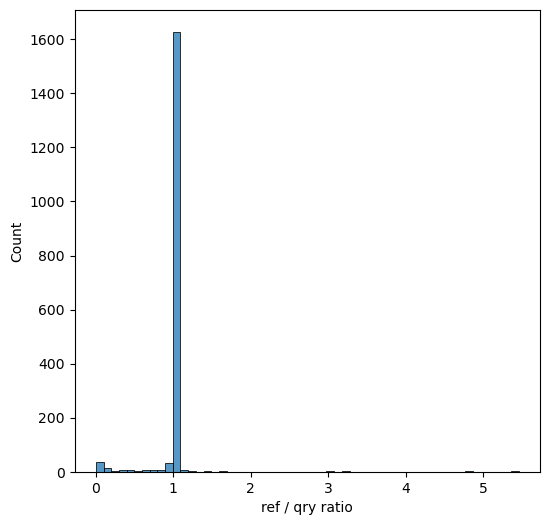

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(x, binwidth=0.1, fill=True, ax=ax)
ax.set_xlabel('ref / qry ratio')

0.23237860076182032


0.949517867271696

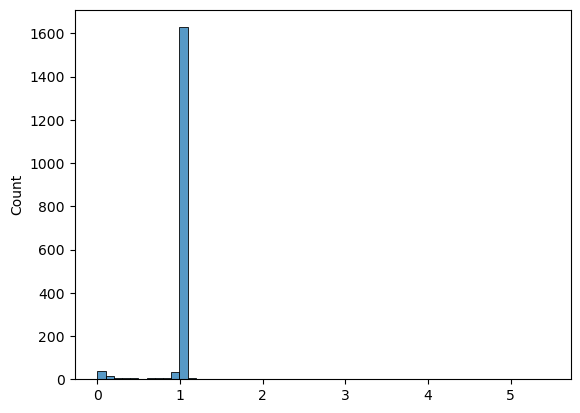

In [6]:
sns.histplot(x, binwidth= 0.1, fill=True)
print(stdev(x))
len(list(filter(lambda t: 0.8 <= t <= 1.2, x))) / len(x)

In [7]:
print(x)

[1.0152287082869254, 0.9319963785078049, 0.9971073221181983, 1.0007572251921697, 0.997615215286969, 0.9267694897730296, 0.9952614676927682, 0.9788331993047141, 0.6081335888676769, 1.004213234883275, 0.9987462897744592, 0.996597748518609, 0.9943521102070572, 1.0071391330352826, 0.9260722935914367, 0.9993344423154644, 0.9989080124274049, 0.9998912629145305, 0.9806499072048764, 1.0000236115754892, 1.0287579774570859, 0.9935460009179576, 0.9990506844157501, 1.0108228830324253, 1.0003008248727583, 1.0155242867263605, 1.0, 1.0239289961352651, 1.0, 4.841972606526973, 0.9997589667712866, 0.9989686934777279, 0.10765202182366168, 0.9999794378966016, 1.0010017758112855, 1.0, 0.9919602943553134, 0.9999041947330214, 0.996883363755182, 1.0, 1.0425487964313644, 1.0000140761734553, 1.0000005926516822, 1.0, 1.0, 1.1330416437717152, 1.0178924022757658, 0.18204001847336934, 1.0003982918520231, 1.0, 0.9928977290994019, 0.996020114449397, 1.0001412679594706, 1.0, 0.9705091350132192, 1.0, 1.0285014028011412

In [8]:
SV_RATIO = 0.1
print(SV_RATIO, len(list(filter(lambda t: not (1 - SV_RATIO <= t <= 1 + SV_RATIO), x))))

0.1 100


In [9]:
np.arange(0)

array([], dtype=int64)

In [10]:
for i in range(5, 51, 5):
    SV_RATIO = i / 100
    print(SV_RATIO, len(list(filter(lambda t: not (1 - SV_RATIO <= t <= 1 + SV_RATIO), x))))

0.05 114
0.1 100
0.15 93
0.2 89
0.25 84
0.3 78
0.35 76
0.4 73
0.45 72
0.5 69
